<a href="https://colab.research.google.com/github/Ironsoldier353/phishing_url_detection/blob/main/phishing_URL_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d sergioagudelo/phishing-url-detection


Dataset URL: https://www.kaggle.com/datasets/sergioagudelo/phishing-url-detection
License(s): MIT
100% 375M/376M [00:02<00:00, 190MB/s]
100% 376M/376M [00:02<00:00, 138MB/s]


In [4]:
!unzip phishing-url-detection.zip


Archive:  phishing-url-detection.zip
  inflating: out.csv                 


In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv('out.csv')

print(data.head())


                                             url          source       label  \
0  apaceast.cloudguest.central.arubanetworks.com  Cisco-Umbrella  legitimate   
1                              quintadonoval.com        Majestic  legitimate   
2                               nomadfactory.com        Majestic  legitimate   
3                               tvarenasport.com        Majestic  legitimate   
4                    widget.cluster.groovehq.com  Cisco-Umbrella  legitimate   

   url_length  starts_with_ip  url_entropy  has_punycode  digit_letter_ratio  \
0          45           False     3.924535         False                 0.0   
1          17           False     3.572469         False                 0.0   
2          16           False     3.327820         False                 0.0   
3          16           False     3.500000         False                 0.0   
4          27           False     3.930270         False                 0.0   

   dot_count  at_count  dash_count  tl

In [7]:
print("Shape of the dataset:", data.shape)

print("Missing values:\n", data.isnull().sum())

print("Summary statistics:\n", data.describe())


Shape of the dataset: (2500000, 18)
Missing values:
 url                        1
source                     0
label                      0
url_length                 0
starts_with_ip             0
url_entropy                0
has_punycode               0
digit_letter_ratio         1
dot_count                  0
at_count                   0
dash_count                 0
tld_count                  0
domain_has_digits          0
subdomain_count            0
nan_char_entropy           0
has_internal_links         0
whois_data            545300
domain_age_days       750689
dtype: int64
Summary statistics:
          url_length   url_entropy  digit_letter_ratio     dot_count  \
count  2.500000e+06  2.500000e+06        2.499999e+06  2.500000e+06   
mean   4.588017e+01  3.907981e+00        1.168567e-01  2.174582e+00   
std    7.439959e+01  6.357209e-01        2.451448e-01  1.736380e+00   
min    4.000000e+00 -0.000000e+00        0.000000e+00  0.000000e+00   
25%    1.700000e+01  3.452820e+00   

In [15]:
if 'digit_letter_ratio' in data.columns:
    data['digit_letter_ratio'].fillna(data['digit_letter_ratio'].mean(), inplace=True)

if 'domain_age_days' in data.columns:
    data['domain_age_days'].fillna(data['domain_age_days'].mean(), inplace=True)

# Check for missing values
print(data.isnull().sum())


label                 0
url_length            0
starts_with_ip        0
url_entropy           0
has_punycode          0
digit_letter_ratio    0
dot_count             0
at_count              0
dash_count            0
tld_count             0
domain_has_digits     0
subdomain_count       0
nan_char_entropy      0
has_internal_links    0
domain_age_days       0
dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = data.drop('label', axis=1)
y = data['label']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    249866
           1       1.00      1.00      1.00    250134

    accuracy                           1.00    500000
   macro avg       1.00      1.00      1.00    500000
weighted avg       1.00      1.00      1.00    500000



In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

# Preprocessing
data.fillna({
    'url': 'placeholder_url',
    'digit_letter_ratio': 0,
    'nan_char_entropy': 0,
    'domain_age_days': 0
}, inplace=True)

# Define features and target variable
X = data.drop(columns=['label', 'url', 'source', 'whois_data'])  # Exclude non-numeric columns
y = data['label'].map({'legitimate': 0, 'phishing': 1})

X = pd.get_dummies(X, drop_first=True)  # drop_first to avoid dummy variable trap

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')
print(f'Standard Deviation of CV Scores: {cv_scores.std()}')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


Cross-Validation Scores: [1.        0.999995  0.999995  0.999995  0.9999975]
Mean CV Score: 0.9999965
Standard Deviation of CV Scores: 2.0000000000131022e-06
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    249866
           1       1.00      1.00      1.00    250134

    accuracy                           1.00    500000
   macro avg       1.00      1.00      1.00    500000
weighted avg       1.00      1.00      1.00    500000



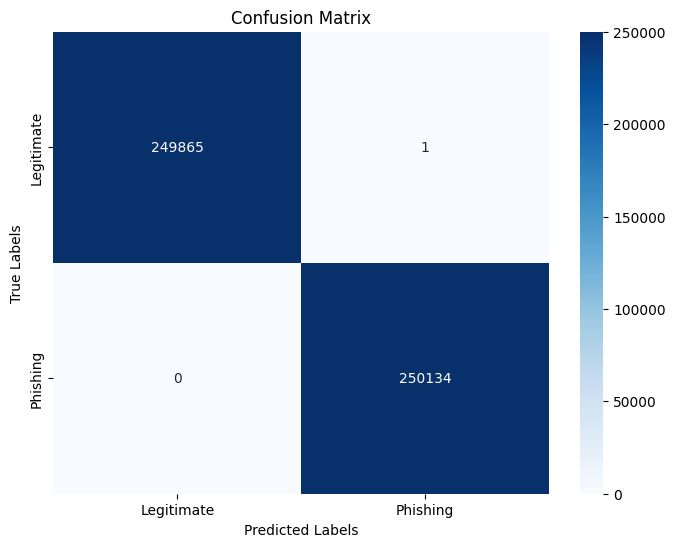

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()